<a href="https://colab.research.google.com/github/sun226/AI2/blob/main/a_imgfolderLoad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.utils.data as data
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

from torch.autograd import Variable

In [9]:
imgsize = 128

In [12]:
img_dir = "drive/MyDrive/my_catdog/train/"

my_train = dset.ImageFolder(img_dir, transforms.Compose([
             transforms.Resize((imgsize, imgsize)) ,
             transforms.ToTensor()
             ]))

print(my_train.__len__())

10


In [13]:
nclass = len(my_train.classes)
print ("# of classes(클래스 개수): %d" %nclass)

print ("클래이 이름:", my_train.classes)
print ("클래스별 인덱스:", my_train.class_to_idx)
print ("my_train 개수:", my_train.__len__())

# of classes(클래스 개수): 2
클래이 이름: ['cats', 'dogs']
클래스별 인덱스: {'cats': 0, 'dogs': 1}
my_train 개수: 10


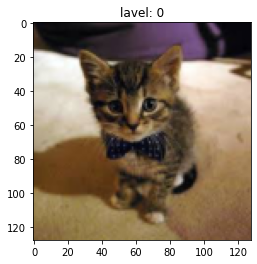

(128, 128, 3)


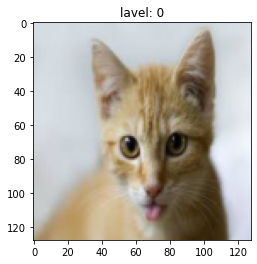

(128, 128, 3)


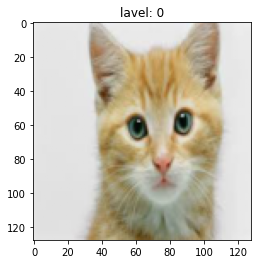

(128, 128, 3)


In [14]:
for i in range(3):
    img = my_train[i][0].numpy()
    img = np.transpose(img, (1, 2, 0))

    plt.title("lavel: %d" %my_train[i][1] )
    plt.imshow(img)
    plt.show()

    print(img.shape)

In [15]:
batch_size= 3

In [16]:
train_loader = data.DataLoader(my_train, batch_size=batch_size,
                               shuffle=False, num_workers=2,
                               drop_last=True)

[0]
한 번에 로드되는 데이터 크기: 3
torch.Size([3, 3, 128, 128])
torch.Size([3])


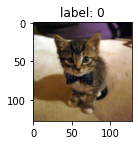

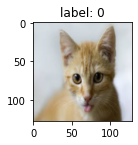

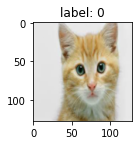

[1]
한 번에 로드되는 데이터 크기: 3
torch.Size([3, 3, 128, 128])
torch.Size([3])


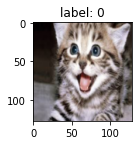

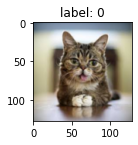

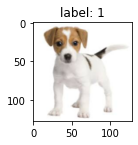

[2]
한 번에 로드되는 데이터 크기: 3
torch.Size([3, 3, 128, 128])
torch.Size([3])


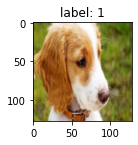

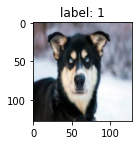

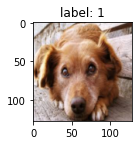

In [17]:
n = 3
for i, [imgs, labels] in enumerate(train_loader):
    if i>5:
        break

    print ("[%d]" %i)
    print ("한 번에 로드되는 데이터 크기:", len(imgs))

    x = Variable(imgs)
    y_ = Variable(labels)

    print(x.shape)
    print(y_.shape)

    for j in range(n):
        img = imgs[j].numpy()
        img = np.transpose(img, (1, 2, 0))

        plt.subplot(1, n, j+1)
        plt.imshow(img)
        plt.title("label: %d" %labels[j] )
        plt.show()